# Midterm Exam

- **Subject:** Computational Physics I
- **Date:** Tuesday 27 June 2023
- **Credits:** 30 points
- **Number of problems:** 6
- **Type of evaluation:** Midterm Exam

## Instructions:

- When you finish, please send your .ipynb file via email to wbanda@yachaytech.edu.ec


- The exam is open-book and has two parts:

**Part I** should be submitted **individually** by the end of the class today.

        
**Part II** can be submitted **individually or in pairs** by Friday 7th July (by the end of the day).


- You can call your notebook with your surname/s, e.g. name.ipynb, and also include your name/s in the notebook.


- Within a **single python notebook**, add the following:

# Name: Gabriel Balarezo

## Part I (12 points): in class

### 1. (4 points) Orbital dynamics
This problem consists of computing and displaying the orbits of two of Earth's sattelites around the Sun:

- The Moon with an orbital period of $T_{moon} = 27.3\,\rm days$ around our planet and located at a distance of $3.8\times 10^5\,\rm km$ from Earth.


- A human-made satellite in Geosynchronous Earth Orbit (GEO) with an orbital period of $T_{geo} = 1\,\rm day$ around our planet and located at a distance of $3.6 \times 10^4\,\rm km$ from Earth.

For simplicity, we can assume that all the orbits are circular. Thus, the Earth's orbit around the Sun is described by the following parametric equations:

$$x_{earth} = R\,\cos(\omega_{earth}\,t)$$

$$y_{earth} = R\,\sin(\omega_{earth}\,t)$$

where $R=1.5\times 10^8\,\rm km$ is the Sun-Earth distance, $\omega_{earth}=\frac{2\pi}{T_{earth}}$, and $T_{earth} = 365\,\rm days$.


Similarly, the orbits of each satellite ($i$) is the sum of its position relative to Earth and the position of Earth relative to the Sun (which is at the origin), so:

$$x_{i} = x_{earth} + r_i\,\cos(\omega_{i}\,t)$$

$$y_{i} = x_{earth} + r_i\,\sin(\omega_{i}\,t)$$

where $i$ refers to either the Moon or the GEO satellite, $r_i$ to their distances from Earth, and $\omega_{i}=\frac{2\pi}{T_{i}}$ refers to their respective angular frequencies.

In [1]:
# Import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scienceplots

In [2]:
# Set plot style
plt.style.use(['science', 'notebook', 'no-latex'])


(a) Create a python function that takes the period ($T$) as argument and returns the angular frequency ($\omega$) of any body. Then, call your function and assign to three global Python variables the angular frequencies of: i) Earth while orbiting around the Sun, (ii) the Moon, and (iii) the GEO satellite orbiting around Earth.

In [3]:
# Define the function
def AngularFrequency(T):
    """
    Function to compute the angular frequency of 
    any body given its period of oscillation.

    Arguments:
            - T (float) : Period of oscillation

    Returns:
            - w (float) : Angular frequency of the body
    """
    
    w = 2 * np.pi/T
    
    return w

In [4]:
# Define the period of the three bodies 
T_earth = 365  # days
T_moon = 27.3  # days 
T_geo = 1 # day  

# Call the function 
w_earth = AngularFrequency(T_earth)
w_moon  = AngularFrequency(T_moon)
w_geo   = AngularFrequency(T_geo)

(b) Create a vector for time, $t$, that spans from $0$ to $365 \,\rm days$, and define $R$ and $r_i$ as global variables.

In [5]:
# Define the time vector 
time = np.linspace(0, 365, 365)

# Define R, and ri as global variables
r_earth = 1.5e8 # km
d_moon_earth = 3.8e5 # km
d_geo_earth = 3.6e4 # km 

(c) Create a python function that takes $R$, $r_i$, $t$ as arguments and returns $x_{i}$ and $y_{i}$ for either the Moon and the GEO satellite. Then, call your function, retrieve $x_{i}$ and $y_{i}$, and save them into a CSV file with 7 columns: $t$, $x_{earth}$, $y_{earth}$, $x_{moon}$, $y_{moon}$, $x_{geo}$, $y_{geo}$.

In [6]:
# Define the function 

def OrbitCoords(r, t, w):
    """
    Function to compute the positions 
    coordinates of a body in orbit.

    Arguments:
            - r (np.array) : Radius of the orbit
            - t (np.array) : Time
            - w (float)    : Angular frequency

    Returns:
            - x (np.array) : x-coordinates of the body
            - y (np.array) : y-coordinates of the body
    """
    #compute the coordinates for a satellite
    
    x = x_earth + r * np.cos(w * t)
    y = y_earth + r * np.sin(w * t)
    
    return x, y 

In [7]:
# We need to compute the coordinates for the earth 
x_earth = r_earth * np.cos(w_earth * time)
y_earth = r_earth * np.sin(w_earth * time)
    
# Call the function for the moon and geo satellite 
x_geo, y_geo = OrbitCoords(d_geo_earth, time, w_geo)
x_moon, y_moon = OrbitCoords(d_moon_earth, time, w_moon)

In [8]:
#Let's create a data frame using pandas 
data = pd.DataFrame({
    't': time,
    'x_earth': x_earth,
    'y_earth': y_earth,
    'x_moon': x_moon,
    'y_moon': y_moon,
    'x_geo': x_geo,
    'y_geo': y_geo})

# Save to a CSV file
data.to_csv('./orbital_positions.csv', sep = ",")

(d) Make a 2D Cartesian plot, with the Sun in the origin, showing the orbits of our planet, the Moon, and the GEO satellite around the Sun for a full year. Which orbit is more intricate?

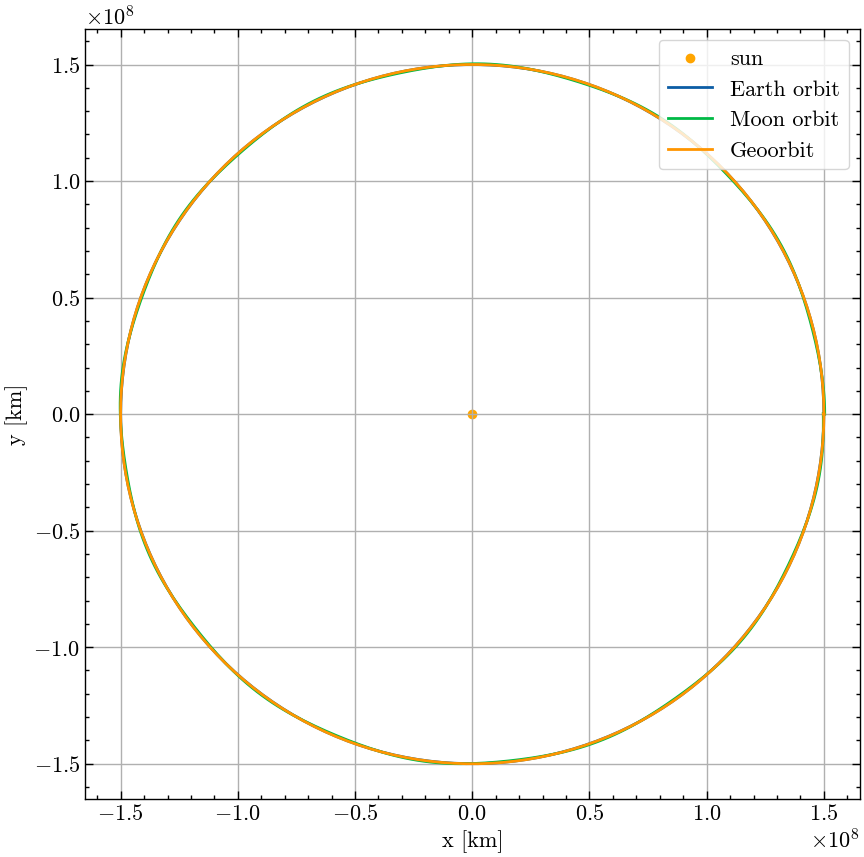

In [9]:
# Plotting 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(0, 0, marker='o', color='orange', label='sun')
ax.plot(x_earth, y_earth, label = 'Earth orbit')
ax.plot(x_moon, y_moon, label = 'Moon orbit')
ax.plot(x_geo, y_geo, label = 'Geoorbit')
ax.set(xlabel='x [km]', ylabel='y [km]')
ax.grid(True)
ax.legend(loc='upper right', frameon = True)
plt.show()
plt.close()

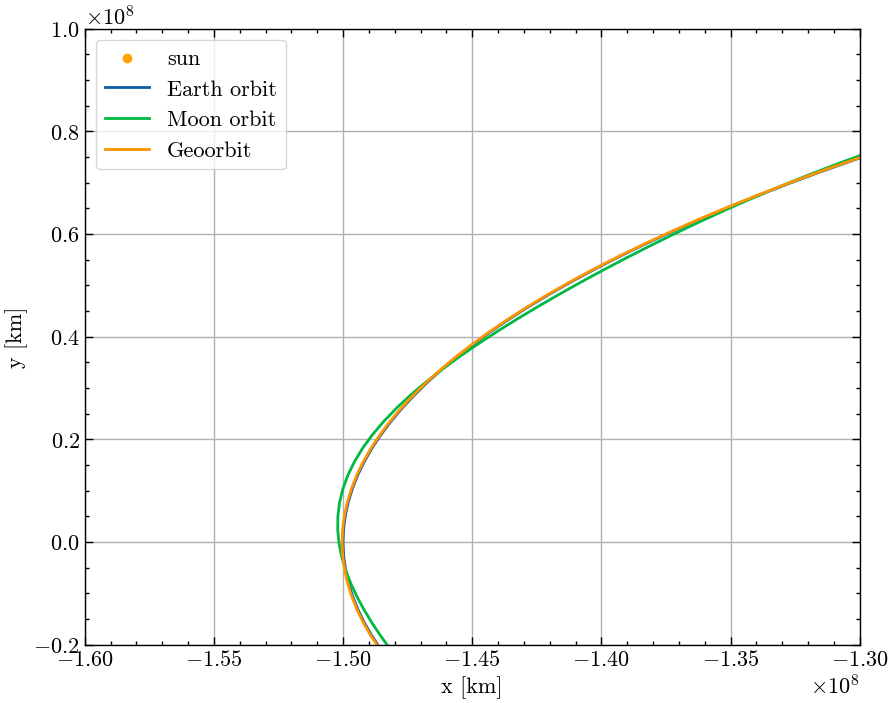

In [10]:
# Plotting with a zoom 
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(0, 0, marker='o', color='orange', label='sun')
ax.plot(x_earth, y_earth, label = 'Earth orbit')
ax.plot(x_moon, y_moon, label = 'Moon orbit')
ax.plot(x_geo, y_geo, label = 'Geoorbit')
ax.set(xlabel='x [km]', ylabel='y [km]')
ax.grid(True)
ax.legend(loc='upper left', frameon = True)
plt.xlim(-1.6e8, -1.3e8)
plt.ylim(-2e7, 1e8)
plt.show()
plt.close()

#### ANSWER:
We can notice that the more intricate orbit is that one of the geo satellite 

### 2. (4 points) Spectral fitting

This problem consists of fitting spectral lines and finding the relative velocities between multiple Gaussian components (interstellar gas clouds).

The supplied data file:

https://github.com/wbandabarragan/computational-physics-1/tree/main/exams/data_sets/j094242-7731_gass_spectra.txt


contains observational data from the Parkes radio telescope (see https://en.wikipedia.org/wiki/Parkes_Observatory).

The data corresponds to $\rm H_{I}$ clouds in the Chamaeleon molecular cloud complex (see https://en.wikipedia.org/wiki/Chamaeleon_complex).

This data file contains emission line features from neutral hydrogen ($\rm H_{I}$, i.e., $\lambda = 21\,\rm cm$) in the Milky Way. The first column has gas velocities and the second column emission intensity (called brightness temperature in $K$). We can assume that each gas cloud in our line of sight produces a Gaussian emission feature that is only dependent on the column density if the gas is optically thin.

Carry out the following calculations using Python: 

(a) Read in the spectral data (velocity and intensity) from the file, and make a plot of the spectrum (velocity on the x-axis and intensity on the y-axis). How many "$\rm H_{I}$ clouds" do you see? Note that each Gaussian-like feature represents a separate $\rm H_{I}$ cloud.

In [11]:
# Read the data 
spectra_data = pd.read_csv("./j094242-7731_gass_spectra.txt")

# Put into numpy arrays
velocity = np.array(spectra_data['Velocity'])
intensity = np.array(spectra_data['Intensity'])

print(velocity.shape, intensity.shape)

(1201,) (1201,)


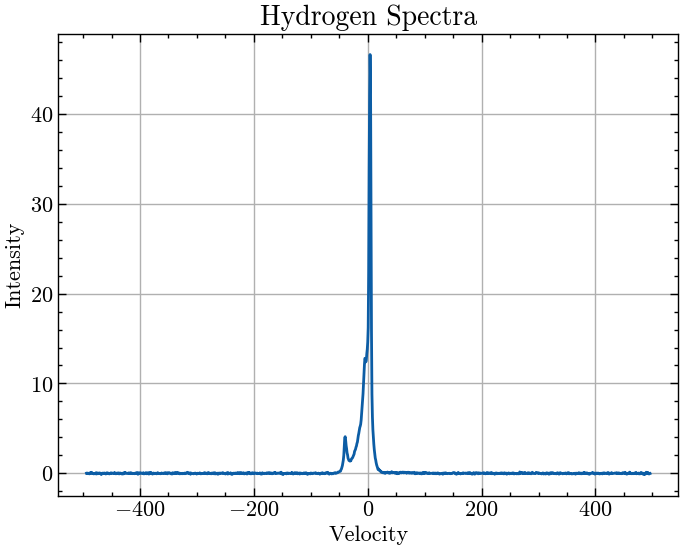

In [12]:
# Plotting 
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(velocity, intensity)
ax.set_title('Hydrogen Spectra', fontsize = 20)
ax.set(xlabel='Velocity', ylabel='Intensity')
ax.grid(True)
plt.show()
plt.close()

After plotting the data, we can notice that there are three peaks, which could mean that we can see here at least 3 H clouds 

(b) Define a multi-Gaussian model for the spectrum and fit your model to the spectrum. **Hint:** a model with 3 Gaussians would be sufficient.


In [13]:
# Python function to model the Gaussian
def GaussianFunction(x, a, b, c):
    """
    Function to model a Gaussian function 
    to fit spectra data.

    Arguments:
            - x (np.array) : x-values
            - a (float)    : Amplitude
            - b (float)    : Center
            - c (float)    : Width

    Returns:
            - y (np.array) : gaussian function
    """
    
    y = a*np.exp(-b*(x + c)**2)
    
    return y

In [14]:
# Python function to model the Gaussian
def ThreeGaussianFunction(x, a, b, c, d, e, f, g, h, k):
    """
    Function to model a Gaussian function to
    fit spectra data using three Gaussians.

    Arguments:
            - x (np.array) : x-values
            - a (float)    : Amplitude 1
            - b (float)    : Center 1
            - c (float)    : Width 1
            - d (float)    : Amplitude 2
            - e (float)    : Center 2
            - f (float)    : Width 2
            - g (float)    : Amplitude 3
            - h (float)    : Center 3
            - k (float)    : Width 3

    Returns:
            - y (np.array) : linear combination of three Gaussians
    """
    
    y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2) + g*np.exp(-h*(x + k)**2)
    
    return y

In [15]:
# The regression coefficients and the covariance matrix.

coef, cova = opt.curve_fit(ThreeGaussianFunction, velocity, intensity)

print("Best-fit parameters", coef)

#print(cova)

print("Associated uncertainties:", np.sqrt(np.diag(cova)))

Best-fit parameters [ 1.27365375e+01  9.10550992e-03  1.67689811e+00  3.80557470e+01
  2.10562036e-01 -4.12143312e+00  2.32941556e+00  2.47418536e-03
  2.80010410e+01]
Associated uncertainties: [1.18173206e-01 1.70177389e-04 8.80357820e-02 1.61962465e-01
 2.25703245e-03 6.97585891e-03 4.89699313e-02 2.42373949e-04
 7.78501710e-01]


/tmp/ipykernel_17131/1316870052.py:23: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2) + g*np.exp(-h*(x + k)**2)
/tmp/ipykernel_17131/1316870052.py:23: RuntimeWarning: invalid value encountered in add
  y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2) + g*np.exp(-h*(x + k)**2)
/tmp/ipykernel_17131/1316870052.py:23: RuntimeWarning: overflow encountered in multiply
  y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2) + g*np.exp(-h*(x + k)**2)


In [16]:
# Call the Gaussian function
intensity_fit = ThreeGaussianFunction(velocity, *coef)

# Get each Gaussian separately
gaussian_1 = GaussianFunction(velocity, coef[0], coef[1], coef[2])
gaussian_2 = GaussianFunction(velocity, coef[3], coef[4], coef[5])
gaussian_3 = GaussianFunction(velocity, coef[6], coef[7], coef[8])

(c) Make a high-quality, labeled plot that shows the original spectrum, the overall multi-Gaussian fit, and also each individual Gaussian component.

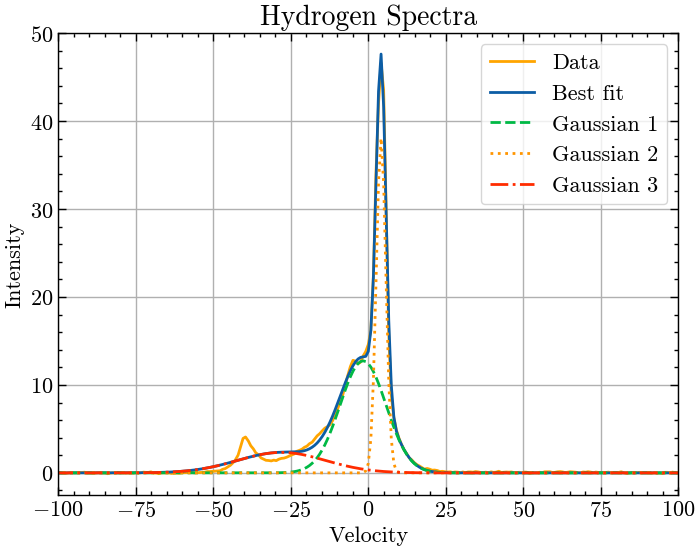

In [17]:
# Plotting 
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(velocity, intensity, color = 'orange', label = 'Data')
ax.plot(velocity, intensity_fit, label = 'Best fit')
ax.plot(velocity, gaussian_1, linestyle='--', label = 'Gaussian 1') # gaussian 1
ax.plot(velocity, gaussian_2, linestyle = ':', label = 'Gaussian 2') # gaussian 2
ax.plot(velocity, gaussian_3, linestyle = '-.', label = 'Gaussian 3') # gaussian 3
ax.set_title('Hydrogen Spectra', fontsize = 20)
ax.set(xlabel='Velocity', ylabel='Intensity')
ax.set_xlim(-100, 100)
ax.grid(True)
ax.legend(loc='best', frameon = True)
plt.show()
plt.close()

(d) Find the (velocity, intensity) coordinates of the maximum of each Gaussian component. Use the computed coordinates to compare the central velocities of the clouds, and calculate the relative velocity between the clouds. **Note:** the velocity coordinates of the maxima are called central velocities.

In [18]:
# Maximiun velocity-intensity 
velocity_1 = -1 *coef[2]
intensity_1 = GaussianFunction(velocity_1, coef[0], coef[1], coef[2])

# Gaussian 2
velocity_2 = -1 *coef[5]
intensity_2 = GaussianFunction(velocity_2, coef[3], coef[4], coef[5])

# Gaussian 3 
velocity_3 = -1 *coef[8]
intensity_3 = GaussianFunction(velocity_3, coef[6], coef[7], coef[8])

In [19]:
print('Gaussian 1')
print(f"velocity = {velocity_1}, intensity = {intensity_1}")

print('Gaussian 2')
print(f"velocity = {velocity_2}, intensity = {intensity_2}")

print('Gaussian 3')
print(f"velocity = {velocity_3}, intensity = {intensity_3}")

Gaussian 1
velocity = -1.6768981078540575, intensity = 12.736537458911553
Gaussian 2
velocity = 4.121433117021235, intensity = 38.05574700915267
Gaussian 3
velocity = -28.00104095546722, intensity = 2.3294155571177466


### 3. (4 points) Stochastic 2D velocity fields

This problem aims at producing stochastic velocity fields in 2D, which can then be compared with simulatons of 2D turbulence.


(a) Generate a 2D meshgrid with $x\in [-2,2]$ an $y\in [-2,2]$ and $[N\times N]=[200\times 200]$ grid cells.

In [20]:
# creta x y arrays 
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)

In [21]:
# Create the meshgrid 
x2d, y2d = np.meshgrid(x, y)


(b) Create a Python function that takes $N=200$ as an argument and returns 2D arrays with the x- and y-components of 3 stochastic velocity fields:

- A random field. **Hint:** use np.random.rand()

- A Gaussian random field. **Hint:** use np.random.randn()

- A log-normal random field. **Hint:** use np.random.lognormal()

**Notes:** In all cases, you can use any default values as fiducial parameters or any values that you consider adequate because the distributions can always be re-normalised. Also, remember that the seed needs to be fixed (see np.random.seed()) when you generate random numbers so that the results are reproducible.

In [22]:
# Define the function
def stochastic_velocity_fields(N):
    """ 
    Function to generate random velocity fields.
    The function generates a random velocity field, 
    a Gaussian velocity field, and a log-normal velocity field.

    Arguments:
            - N (int) : Number of grid points

    Returns:   
            - random_field_x (np.array)    : x-component of the random velocity field
            - random_field_y (np.array)    : y-component of the random velocity field
            - gaussian_field_x (np.array)  : x-component of the Gaussian velocity field
            - gaussian_field_y (np.array)  : y-component of the Gaussian velocity field
            - lognormal_field_x (np.array) : x-component of the log-normal velocity field
            - lognormal_field_y (np.array) : y-component of the log-normal velocity field
    """
    np.random.seed(5)  # Fix the random seed for reproducibility
    
    # Random field
    random_field_x = np.random.rand(N, N)
    random_field_y = np.random.rand(N, N)
    
    # Gaussian random field
    gaussian_field_x = np.random.randn(N, N)
    gaussian_field_y = np.random.randn(N, N)
    
    # Log-normal random field
    lognormal_field_x = np.random.lognormal(mean=0, sigma=1, size=(N, N))
    lognormal_field_y = np.random.lognormal(mean=0, sigma=1, size=(N, N))
    
    return random_field_x, random_field_y, gaussian_field_x, gaussian_field_y, lognormal_field_x, lognormal_field_y

(c) Calculate the modulus of each stochastic velocity field, and make a three-panel plot showing the three 1D histograms of the modulus of each velocity field.

In [23]:
# Generate the stochastic velocity fields
random_field_x, random_field_y, gaussian_field_x, gaussian_field_y, lognormal_field_x, lognormal_field_y = stochastic_velocity_fields(200)

# Calculate the modulus of each velocity field
random_field_modulus    = np.sqrt(random_field_x**2 + random_field_y**2)        #np.hypot(random_field_x, random_field_y)
gaussian_field_modulus  = np.sqrt(gaussian_field_x**2 + gaussian_field_y**2)    #np.hypot(gaussian_field_x, gaussian_field_y)
lognormal_field_modulus = np.sqrt(lognormal_field_x**2 + lognormal_field_y**2)  #np.hypot(lognormal_field_x, lognormal_field_y)

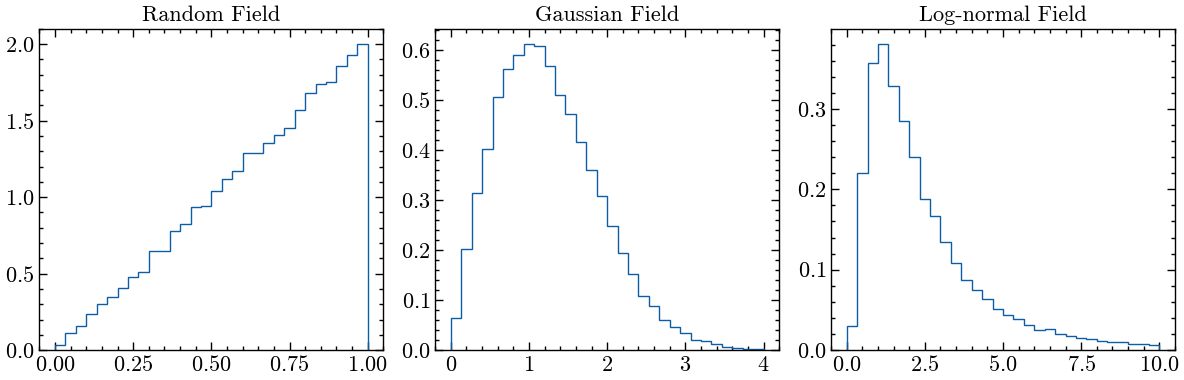

In [24]:
# Create the three-panel histogram plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].hist(random_field_modulus.flatten(), histtype='step', bins=30, range=(0, 1), density=True)
ax[0].set_title('Random Field')

ax[1].hist(gaussian_field_modulus.flatten(), histtype='step', bins=30, range=(0, 4), density=True)
ax[1].set_title('Gaussian Field')

ax[2].hist(lognormal_field_modulus.flatten(), histtype='step', bins=30, range=(0, 10), density=True)
ax[2].set_title('Log-normal Field')

plt.tight_layout()
plt.show()
plt.close()

(d) Make a three-panel plot showing the 3 maps of the resulting moduli of the velocity fields. Comment on the results from (c) and (d), how these stochastic velocity fields differ from one another?

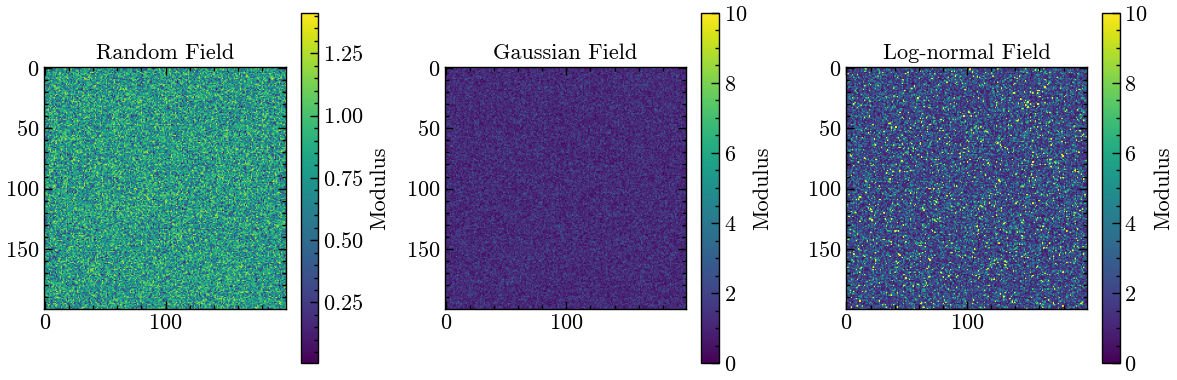

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
im_1 = ax[0].imshow(random_field_modulus, cmap='viridis')
ax[0].set_title('Random Field')
fig.colorbar(im_1, ax=ax[0], label='Modulus')

im_2 = ax[1].imshow(gaussian_field_modulus, cmap='viridis', vmin=0, vmax= 10)
ax[1].set_title('Gaussian Field')
fig.colorbar(im_2, ax=ax[1], label='Modulus')


im_3 = ax[2].imshow(lognormal_field_modulus, cmap='viridis', vmin=0, vmax=10)
ax[2].set_title('Log-normal Field')
fig.colorbar(im_3, ax=ax[2], label='Modulus')

plt.tight_layout()
plt.show()
plt.close()